In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix

In [3]:
import itertools 
import shutil
import os
import random

Using MobileNet Model with Sign-language-digit-dataset (our custom dataset)

In [ ]:
# Organizing the data into train, valid and test dirs
os.chdir('/content/drive/MyDrive/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('valid')
  os.mkdir('test')

  for i in range(0,10):
    shutil.move(f'{i}','train')
    os.mkdir(f'valid/{i}')
    os.mkdir(f'test/{i}')

    valid_samples = random.sample(os.listdir(f'train/{i}'),30)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}', f'valid/{i}') 

    test_samples = random.sample(os.listdir(f'train/{i}'),5)
    for k in test_samples:
      shutil.move(f'train/{i}/{k}', f'test/{i}') 
  
os.chdir('../..')

In [11]:
train_path = '/content/drive/MyDrive/Sign-Language-Digits-Dataset/train'
valid_path = '/content/drive/MyDrive/Sign-Language-Digits-Dataset/valid'
test_path = '/content/drive/MyDrive/Sign-Language-Digits-Dataset/test'

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10
)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10
)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False
)

Found 1711 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [13]:
assert train_batches.n == 1711
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == test_batches.num_classes == test_batches.num_classes == 10

In [14]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [15]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [16]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params':non_trainable_params,'trainable_params':trainable_params}


In [17]:
params = count_params(mobile)
assert params['trainable_params'] == 4231976
assert params['non_trainable_params'] == 21888

In [18]:
x = mobile.layers[-2].output
output = Dense(units=10, activation='softmax')(x)

Since, there is some difference in the architecture of this model from the models which we have seen before like in the above and below cell.
It is because previosuly we was using Sequential model, and now we are using Functional model.
Refer it from google/docs for more information.

In [19]:
model = Model(inputs=mobile.input, outputs=output)

In [20]:
for layer in model.layers[:-23]:
  layer.trainable = False

23 is just a random number, try is with some another number also and check for the accuracy or result comparitively and use the best one

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
172/172 - 545s - loss: 0.7486 - accuracy: 0.7884 - val_loss: 0.2456 - val_accuracy: 0.9067 - 545s/epoch - 3s/step
Epoch 2/10
172/172 - 7s - loss: 0.1145 - accuracy: 0.9632 - val_loss: 0.1631 - val_accuracy: 0.9300 - 7s/epoch - 41ms/step
Epoch 3/10
172/172 - 7s - loss: 0.0690 - accuracy: 0.9743 - val_loss: 0.1036 - val_accuracy: 0.9633 - 7s/epoch - 43ms/step
Epoch 4/10
172/172 - 7s - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.1237 - val_accuracy: 0.9533 - 7s/epoch - 39ms/step
Epoch 5/10
172/172 - 8s - loss: 0.0489 - accuracy: 0.9871 - val_loss: 0.5835 - val_accuracy: 0.8333 - 8s/epoch - 44ms/step
Epoch 6/10
172/172 - 7s - loss: 0.0547 - accuracy: 0.9825 - val_loss: 0.0942 - val_accuracy: 0.9700 - 7s/epoch - 40ms/step
Epoch 7/10
172/172 - 8s - loss: 0.0453 - accuracy: 0.9842 - val_loss: 0.0616 - val_accuracy: 0.9733 - 8s/epoch - 44ms/step
Epoch 8/10
172/172 - 7s - loss: 0.0139 - accuracy: 0.9947 - val_loss: 0.0227 - val_accuracy: 0.9933 - 7s/epoch - 39ms/step
Epoch 9/10
172

In [25]:
test_labels = test_batches.classes

In [29]:
predictions = model.predict(x=test_batches, verbose=0)

In [26]:
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

In [30]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [31]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [32]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9','10']

In [33]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black' )
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 1 0 4 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 1 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


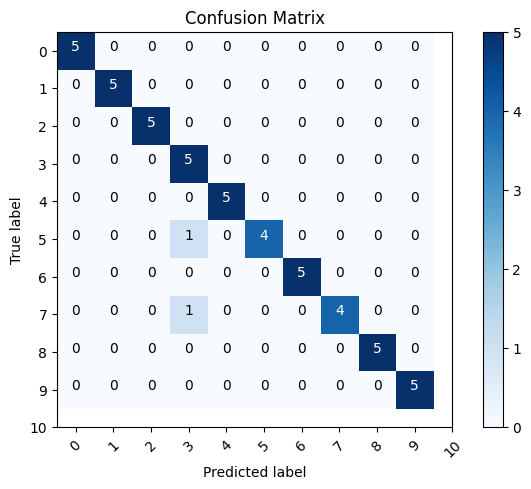

In [34]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')